In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

# 데이터 확인

In [2]:
df = pd.read_csv('./data/cleaned/streams.csv', index_col=0)
df.head(2)

,0시~1시,1시~2시,2시~3시,3시~4시,4시~5시,5시~6시,6시~7시,7시~8시,8시~9시,9시~10시,...,13시~14시,14시~15시,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시
METEOR_창모 (CHANGMO),-0.158998,-0.235707,-0.208502,-0.192565,-0.130965,0.035388,0.615862,1.081598,0.272517,-0.181870,...,0.071129,0.025686,0.008512,0.011133,0.036625,0.067972,-0.123489,-0.116251,-0.138441,-0.124419
Psycho_Red Velvet (레드벨벳),-0.213678,-0.231851,-0.215881,-0.199363,-0.146071,0.013887,0.535579,1.129406,0.485418,-0.183293,...,0.058571,0.027523,0.012719,0.013552,0.044005,0.071401,-0.123025,-0.120268,-0.133228,-0.124301


In [3]:
print('Shape of Data: ', df.shape, '\n')
df.info()

Shape of Data:  (755, 23) 

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, METEOR_창모 (CHANGMO) to 나의 바람 (Wind And Wish)_비투비
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0시~1시    755 non-null    float64
 1   1시~2시    755 non-null    float64
 2   2시~3시    755 non-null    float64
 3   3시~4시    755 non-null    float64
 4   4시~5시    755 non-null    float64
 5   5시~6시    755 non-null    float64
 6   6시~7시    755 non-null    float64
 7   7시~8시    755 non-null    float64
 8   8시~9시    755 non-null    float64
 9   9시~10시   755 non-null    float64
 10  10시~11시  755 non-null    float64
 11  11시~12시  755 non-null    float64
 12  12시~13시  755 non-null    float64
 13  13시~14시  755 non-null    float64
 14  14시~15시  755 non-null    float64
 15  15시~16시  755 non-null    float64
 16  16시~17시  755 non-null    float64
 17  17시~18시  755 non-null    float64
 18  18시~19시  755 non-null    float64
 19  19시~20시  755 non-null    floa

# K 고르기

Label이 없는 데이터를 분류하기 위해 K-Means Clustering과 Agglomerative Clustering을 사용할 것이다. 두 방법 모두 cluster 개수 k를 미리 정해야 한다

## Silhouette Plots

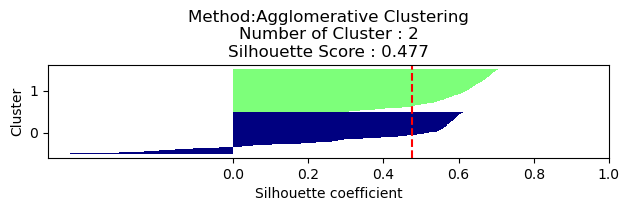

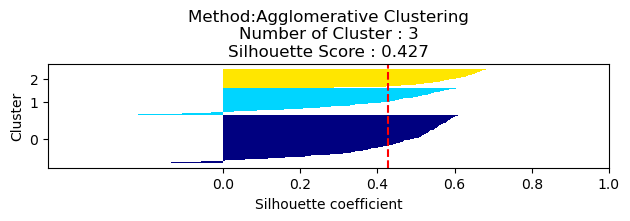

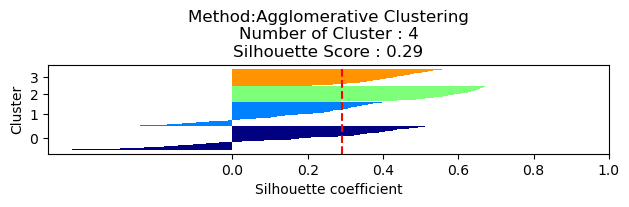

----------------------------------------------------------------------------------------------------


c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


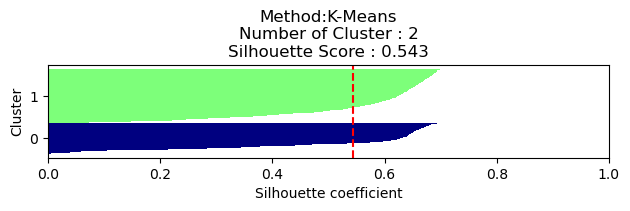

c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


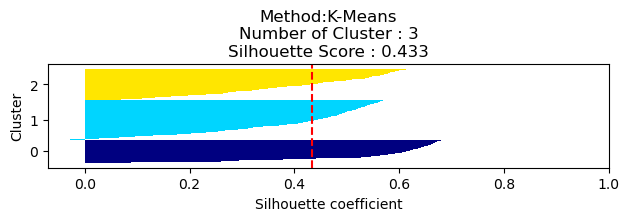

c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


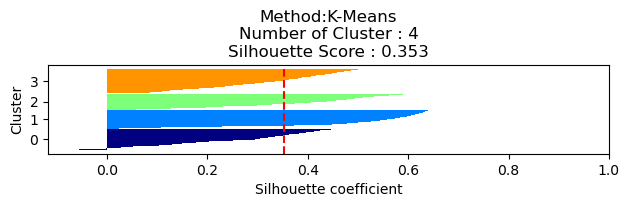

In [4]:
def silhouette_viz(n_cluster, X, method):
    if method == 'agg':
        method_name = 'Agglomerative Clustering'
        agg = AgglomerativeClustering(n_clusters=n_cluster)
        Y_label = agg.fit_predict(X)
    elif method == 'kmeans':
        method_name = 'K-Means'
        km = KMeans(n_clusters=n_cluster, n_init=10)
        Y_label = km.fit_predict(df)

    silhouette_values = silhouette_samples(df, Y_label, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0 #y축 범위 설정위한 변수 선언. 0으로 초기화.
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_label == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height = 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Method:' + method_name + '\n' + 'Number of Cluster : '+ str(n_cluster) + '\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()


for num in range(2,5):
    plt.subplot(3, 1, num-1)
    silhouette_viz(num, df, method='agg')

print('-' * 100)

for num in range(2,5):
    plt.subplot(3, 1, num-1)
    silhouette_viz(num, df, method='kmeans')

## Elbow Method for K-Means Clustering

c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

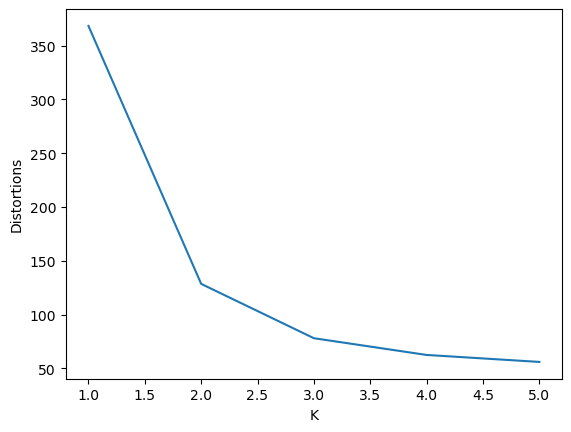

In [5]:
distortions = []

for i in range(1,6):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(df)
    distortions.append(km.inertia_)

plt.plot(range(1,6), distortions);
plt.ylabel('Distortions');
plt.xlabel('K');

Silhouette Plot에서는 K-Means와 Agglomerative Clustering 모두 k=2가 가장 최적으로 나왔다.

K-Means에서 사용하는 Elbow Method에서는 k=2 or k=3이 좋아 보인다

이 정보들을 종합하여 k=2를 사용한다 

In [6]:
k = 2

# K - Means Clustering

In [7]:
km = KMeans(n_clusters=k, n_init=10)
km_labels = km.fit_predict(df)

c:\Users\hlee2\anaconda3\envs\BigData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# Agglomerative Clustering

In [8]:
agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(df)

# 차원축소를 사용한 시각화

## PCA

In [9]:
pca = PCA(n_components=3)
reduced_df = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2', 'PC3'])

## K-Means 분류 결과 시각화

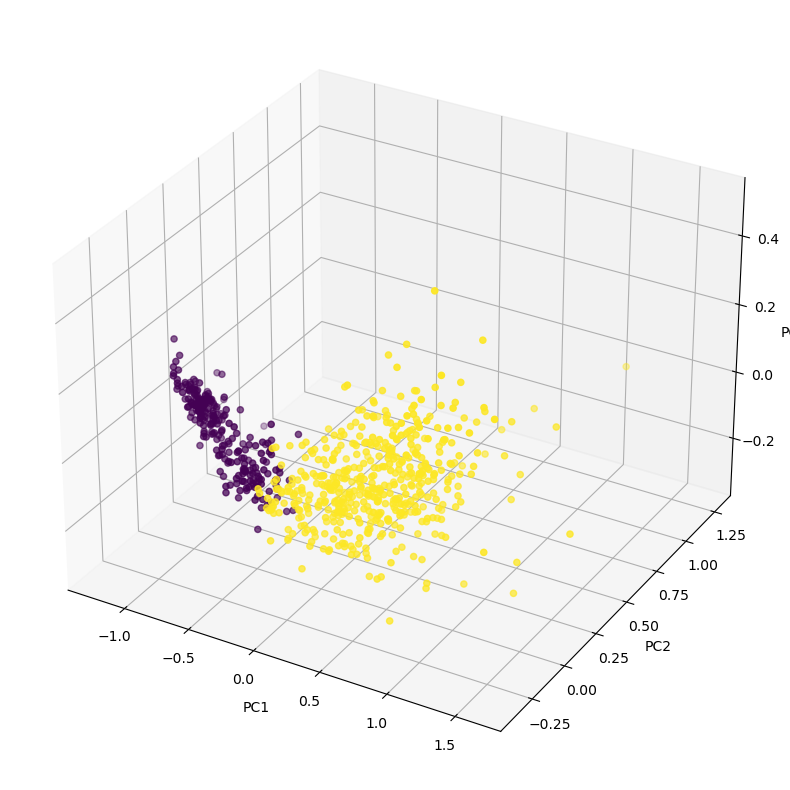

In [10]:
km_reduced_df = reduced_df.copy()
km_reduced_df['Label'] = km_labels

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(km_reduced_df['PC1'], km_reduced_df['PC2'], km_reduced_df['PC3'], c=km_reduced_df['Label'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

## Agglomerative Clustering 분류 결과 시각화

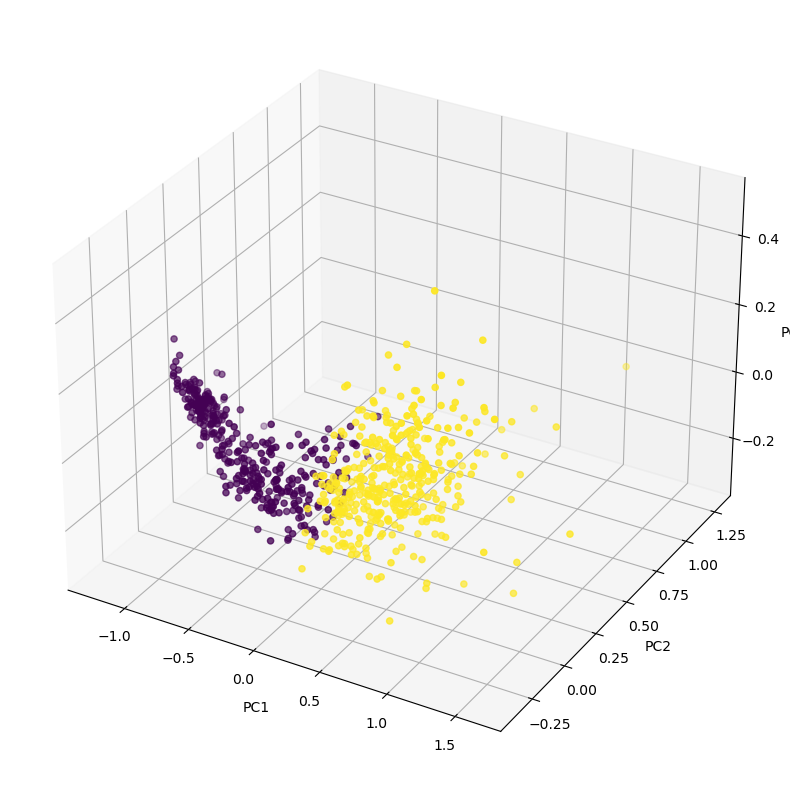

In [11]:
agg_reduced_df = reduced_df.copy()
agg_reduced_df['Label'] = agg_labels

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(agg_reduced_df['PC1'], agg_reduced_df['PC2'], agg_reduced_df['PC3'], c=agg_reduced_df['Label'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

# 분류 결과 확인

In [12]:
# matplotlib 한글 안 깨지게 하는 옵션
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [13]:
result_df = df.copy()
result_df['KMeans_label'] = km_labels
result_df['Agg_label'] = agg_labels


# KMeans에서 각 분류 그룹에 해당하는 데이터들의 인덱스
km_index = {}
for label in range(k):
    km_index[label] = list(result_df[result_df['KMeans_label'] == label].index)

# Agglomerative Clustering에서 각 분류 그룹에 해당하는 데이터들의 인덱스
agg_index = {}
for label in range(k):
    agg_index[label] = list(result_df[result_df['Agg_label'] == label].index)

## KMeans 분류 결과

In [16]:
# 라벨 0/1은 임의로 설정되는 것으로 다시 돌리면 반대로 할당될 수도 있음

print('라벨 1에 해당하는 데이터 수', sum(result_df['KMeans_label'] == 1))
print('라벨 0에 해당하는 데이터 수', sum(result_df['KMeans_label'] == 0))

라벨 1에 해당하는 데이터 수 486
라벨 0에 해당하는 데이터 수 269


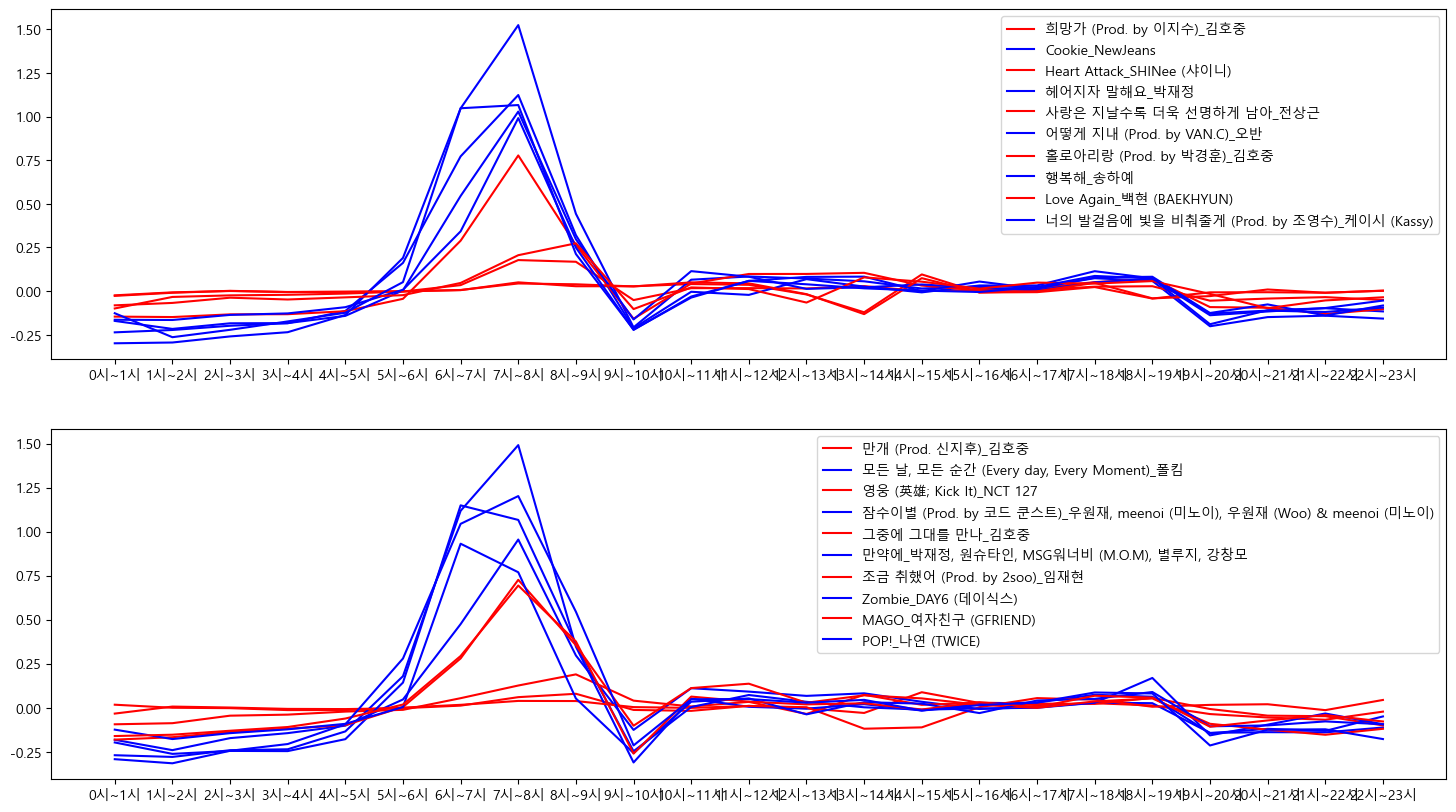

In [14]:
random.seed(77)
plt.figure(figsize=(18,10));

plt.subplot(2,1,1)
for c1, c2 in zip(random.sample(km_index[0],5), random.sample(km_index[1],5)):
    plt.plot(df.loc[c1, :], label=c1, c='red')  # 빨간 색이 라벨 0
    plt.plot(df.loc[c2, :], label=c2, c='blue') # 파란 색이 라벨 1
plt.legend();

plt.subplot(2,1,2)
for c1, c2 in zip(random.sample(km_index[0],5), random.sample(km_index[1],5)):
    plt.plot(df.loc[c1, :], label=c1, c='red')  # 빨간 색이 라벨 0
    plt.plot(df.loc[c2, :], label=c2, c='blue') # 파란 색이 라벨 1
plt.legend();


변동성이 상대적으로 큰 음원과 변동성이 상대적으로 작은 음원으로 어느 정도 잘 분류된 것을 볼 수 있다

## Agglomerative Clustering 분류 결과

In [18]:
# 라벨 0/1은 임의로 설정되는 것으로 다시 돌리면 반대로 할당될 수도 있음

print('라벨 1에 해당하는 데이터 수', sum(result_df['Agg_label'] == 1))
print('라벨 0에 해당하는 데이터 수', sum(result_df['Agg_label'] == 0))

라벨 1에 해당하는 데이터 수 384
라벨 0에 해당하는 데이터 수 371


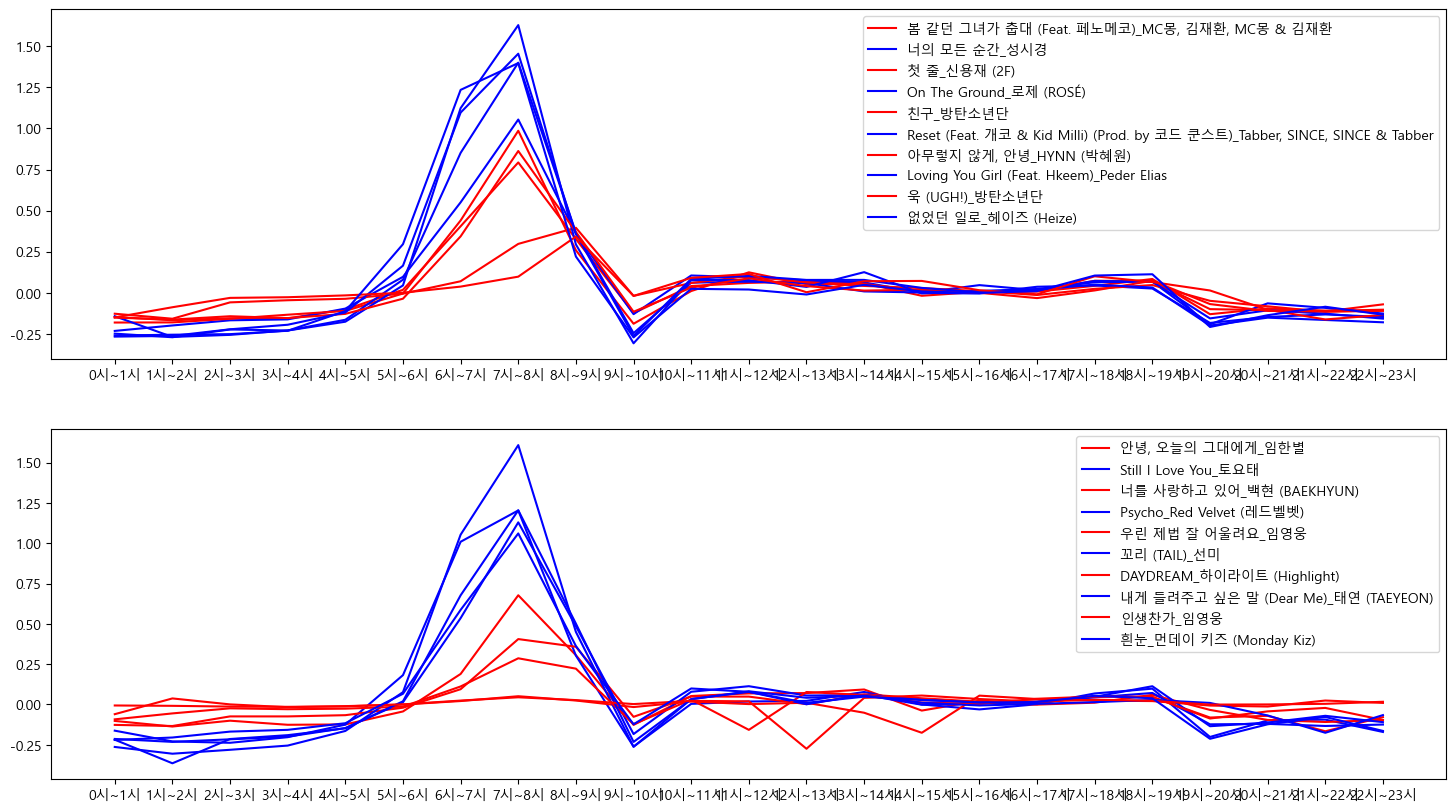

In [15]:
random.seed(77)
plt.figure(figsize=(18,10));

plt.subplot(2,1,1)
for c1, c2 in zip(random.sample(agg_index[0],5), random.sample(agg_index[1],5)):
    plt.plot(df.loc[c1, :], label=c1, c='red')  # 빨간 색이 라벨 0
    plt.plot(df.loc[c2, :], label=c2, c='blue') # 파란 색이 라벨 1
plt.legend();

plt.subplot(2,1,2)
for c1, c2 in zip(random.sample(agg_index[0],5), random.sample(agg_index[1],5)):
    plt.plot(df.loc[c1, :], label=c1, c='red')  # 빨간 색이 라벨 0
    plt.plot(df.loc[c2, :], label=c2, c='blue') # 파란 색이 라벨 1
plt.legend();

변동성이 상대적으로 큰 음원과 변동성이 상대적으로 작은 음원으로 어느 정도 잘 분류된 것을 볼 수 있다